In [2]:
# Read packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Read the dataset
H1 = pd.read_csv("H1.csv")
H2 = pd.read_csv("H2.csv")
H1["Type"] = "Resort"
H2["Type"] = "City"
df = pd.concat([H1,H2],axis=0)
df = df.reset_index(drop=True)

In [4]:
len(df)

119390

In [286]:
df["ArrivalDate"] = pd.to_datetime(df["ArrivalDateYear"].apply(str)+df["ArrivalDateMonth"].apply(lambda x: x[:3])\
                    +df["ArrivalDateDayOfMonth"].apply(str),format="%Y%b%d")
df["ArrivalYM"] = df["ArrivalDate"].dt.strftime("%Y-%m")
df["BookedDate"] = [x-pd.DateOffset(days=y) for x, y in zip(df["ArrivalDate"],df["LeadTime"])]
df["BookedYM"] = df["BookedDate"].dt.strftime("%Y-%m")
df["BookedMonth"] = df["BookedDate"].apply(lambda x: x.month_name())
df["Stays"] = df["StaysInWeekendNights"]+df["StaysInWeekNights"]

df["BookedDay"] = df["BookedDate"].apply(lambda x:x.day_name())
df["ArrivalDay"] = df["ArrivalDate"].apply(lambda x:x.day_name())
df["CheckoutDay"] = [(x+pd.DateOffset(days=y)).day_name() for x, y in zip(df["ArrivalDate"],df["Stays"])]

df["DepositType"] = df["DepositType"].apply(lambda x: x.strip())
df["ReservedRoomType"] = df["ReservedRoomType"].apply(lambda x: x.strip())

In [63]:
print(min(df["ArrivalDate"]))
print(max(df["ArrivalDate"]))

2015-07-01 00:00:00
2017-08-31 00:00:00


In [66]:
df = df[df["ArrivalDate"]<'2017-7-1'].reset_index(drop=True)

In [67]:
print(min(df["ArrivalDate"]))
print(max(df["ArrivalDate"]))

2015-07-01 00:00:00
2017-06-30 00:00:00


In [68]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ArrivalDate,ArrivalYM,BookedDate,BookedYM,BookedMonth,Stays,BookedDay,ArrivalStartDay,CheckoutDay,ArrivalDay
0,0,342,2015,July,27,1,0,0,2,0.0,...,2015-07-01,2015-07,2014-07-24,2014-07,July,0,Thursday,Wednesday,Wednesday,Wednesday
1,0,737,2015,July,27,1,0,0,2,0.0,...,2015-07-01,2015-07,2013-06-24,2013-06,June,0,Monday,Wednesday,Wednesday,Wednesday
2,0,7,2015,July,27,1,0,1,1,0.0,...,2015-07-01,2015-07,2015-06-24,2015-06,June,1,Wednesday,Wednesday,Thursday,Wednesday
3,0,13,2015,July,27,1,0,1,1,0.0,...,2015-07-01,2015-07,2015-06-18,2015-06,June,1,Thursday,Wednesday,Thursday,Wednesday
4,0,14,2015,July,27,1,0,2,2,0.0,...,2015-07-01,2015-07,2015-06-17,2015-06,June,2,Wednesday,Wednesday,Friday,Wednesday


In [69]:
obj = df.select_dtypes(include="object").columns
num = df.select_dtypes(exclude="object").columns

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109152 entries, 0 to 109151
Data columns (total 42 columns):
IsCanceled                     109152 non-null int64
LeadTime                       109152 non-null int64
ArrivalDateYear                109152 non-null int64
ArrivalDateMonth               109152 non-null object
ArrivalDateWeekNumber          109152 non-null int64
ArrivalDateDayOfMonth          109152 non-null int64
StaysInWeekendNights           109152 non-null int64
StaysInWeekNights              109152 non-null int64
Adults                         109152 non-null int64
Children                       109148 non-null float64
Babies                         109152 non-null int64
Meal                           109152 non-null object
Country                        108664 non-null object
MarketSegment                  109152 non-null object
DistributionChannel            109152 non-null object
IsRepeatedGuest                109152 non-null int64
PreviousCancellations          109

In [71]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ArrivalDate,ArrivalYM,BookedDate,BookedYM,BookedMonth,Stays,BookedDay,ArrivalStartDay,CheckoutDay,ArrivalDay
0,0,342,2015,July,27,1,0,0,2,0.0,...,2015-07-01,2015-07,2014-07-24,2014-07,July,0,Thursday,Wednesday,Wednesday,Wednesday
1,0,737,2015,July,27,1,0,0,2,0.0,...,2015-07-01,2015-07,2013-06-24,2013-06,June,0,Monday,Wednesday,Wednesday,Wednesday
2,0,7,2015,July,27,1,0,1,1,0.0,...,2015-07-01,2015-07,2015-06-24,2015-06,June,1,Wednesday,Wednesday,Thursday,Wednesday
3,0,13,2015,July,27,1,0,1,1,0.0,...,2015-07-01,2015-07,2015-06-18,2015-06,June,1,Thursday,Wednesday,Thursday,Wednesday
4,0,14,2015,July,27,1,0,2,2,0.0,...,2015-07-01,2015-07,2015-06-17,2015-06,June,2,Wednesday,Wednesday,Friday,Wednesday


In [72]:
df[num].describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,Stays
count,109152.000000,109152.000000,109152.000000,109152.000000,109152.000000,109152.000000,109152.000000,109152.000000,109148.000000,109152.000000,109152.000000,109152.000000,109152.000000,109152.000000,109152.000000,109152.000000,109152.000000,109152.000000,109152.000000
mean,0.370346,100.103654,2016.077442,26.836650,15.800654,0.910061,2.465754,1.842513,0.092416,0.007925,0.032954,0.094153,0.136745,0.214252,2.535941,97.009076,0.063086,0.544140,3.375815
std,0.482900,104.911028,0.688828,14.162873,8.771709,0.996278,1.898598,0.586506,0.377411,0.097993,0.178517,0.880462,1.446289,0.642110,18.381584,47.025186,0.246487,0.777022,2.545250
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,17.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.220000,0.000000,0.000000,2.000000
50%,0.000000,65.000000,2016.000000,25.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,3.000000
75%,1.000000,152.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,0.000000,1.000000,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,67.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,69.000000


In [73]:
df[obj].describe()

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,Agent,Company,...,ReservationStatus,ReservationStatusDate,Type,ArrivalYM,BookedYM,BookedMonth,BookedDay,ArrivalStartDay,CheckoutDay,ArrivalDay
count,109152,109152,108664,109152,109152,109152,109152,109152,109152,109152,...,109152,109152,109152,109152,109152,109152,109152,109152,109152,109152
unique,12,5,172,8,5,10,12,3,331,345,...,3,865,2,24,39,12,7,7,7,7
top,May,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,NULL,...,Check-Out,2015-10-21,City,2017-05,2016-01,January,Friday,Friday,Sunday,Friday
freq,11791,85327,46026,49741,89229,79953,68295,94648,28150,102544,...,68728,1461,72646,6313,7654,15356,20510,18348,21044,18348


In [74]:
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]

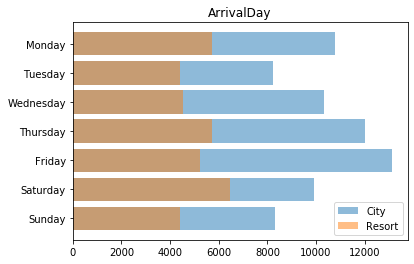

In [77]:
temp_city = df[df["Type"]=="City"]["ArrivalDay"].value_counts().loc[day_order[::-1]]
temp_resort = df[df["Type"]=="Resort"]["ArrivalDay"].value_counts().loc[day_order[::-1]]
plt.barh(temp_city.index,temp_city,alpha=0.5,label="City")
plt.barh(temp_resort.index,temp_resort,alpha=0.5,label="Resort")
plt.title("ArrivalDay")
plt.legend()
plt.show()

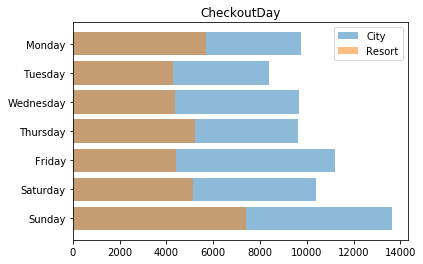

In [78]:
temp_city = df[df["Type"]=="City"]["CheckoutDay"].value_counts().loc[day_order[::-1]]
temp_resort = df[df["Type"]=="Resort"]["CheckoutDay"].value_counts().loc[day_order[::-1]]
plt.barh(temp_city.index,temp_city,alpha=0.5,label="City")
plt.barh(temp_resort.index,temp_resort,alpha=0.5,label="Resort")
plt.title("CheckoutDay")
plt.legend()
plt.show()

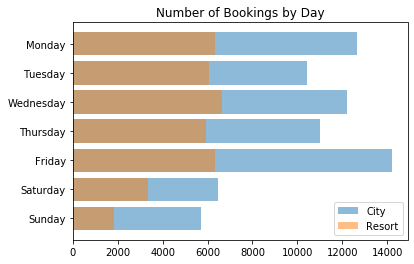

In [237]:
temp_city = df[df["Type"]=="City"]["BookedDay"].value_counts().loc[day_order[::-1]]
temp_resort = df[df["Type"]=="Resort"]["BookedDay"].value_counts().loc[day_order[::-1]]
plt.barh(temp_city.index,temp_city,alpha=0.5,label="City")
plt.barh(temp_resort.index,temp_resort,alpha=0.5,label="Resort")
plt.title("Number of Bookings by Day")
plt.legend()
plt.show()

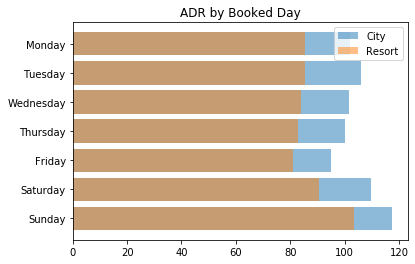

In [236]:
temp_city = df[df["Type"]=="City"].groupby(["BookedDay"])["ADR"].mean().loc[day_order[::-1]]
temp_resort = df[df["Type"]=="Resort"].groupby(["BookedDay"])["ADR"].mean().loc[day_order[::-1]]
plt.barh(temp_city.index,temp_city,alpha=0.5,label="City")
plt.barh(temp_resort.index,temp_resort,alpha=0.5,label="Resort")
plt.title("ADR by Booked Day")
plt.legend()
plt.show()

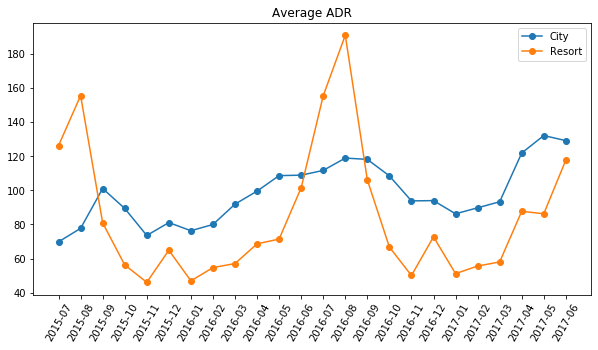

In [81]:
plt.figure(figsize=(10,5))
plt.plot(df[df["Type"]=='City'].groupby("ArrivalYM")["ADR"].mean(), label = "City", marker="o")
plt.plot(df[df["Type"]=='Resort'].groupby("ArrivalYM")["ADR"].mean(), label = "Resort", marker="o")
plt.xticks(rotation=60)
plt.title("Average ADR")
plt.legend()
plt.show()

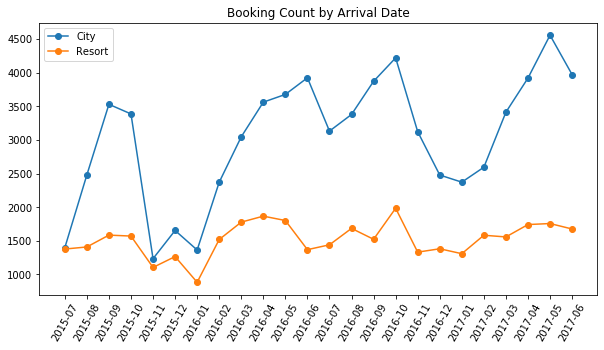

In [86]:
plt.figure(figsize=(10,5))
plt.plot(df[df["Type"]=='City']["ArrivalYM"].value_counts().sort_index(), label = "City", marker="o")
plt.plot(df[df["Type"]=='Resort']["ArrivalYM"].value_counts().sort_index(), label = "Resort", marker="o")
plt.xticks(rotation=60)
plt.title("Booking Count by Arrival Date")
plt.legend()
plt.show()

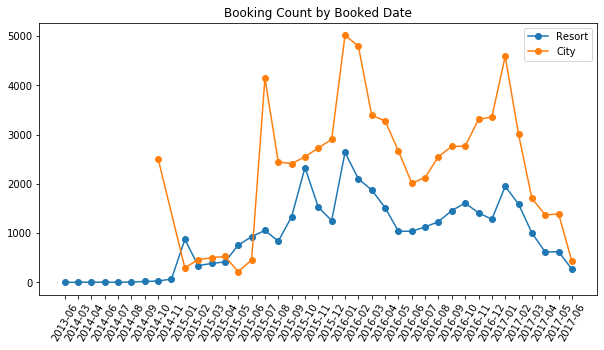

In [90]:
plt.figure(figsize=(10,5))
plt.plot(df[df["Type"]=='Resort']["BookedYM"].value_counts().sort_index(), label = "Resort", marker="o")
plt.plot(df[df["Type"]=='City']["BookedYM"].value_counts().sort_index(), label = "City", marker="o")
plt.xticks(rotation=60)
plt.title("Booking Count by Booked Date")
plt.legend()
plt.show()

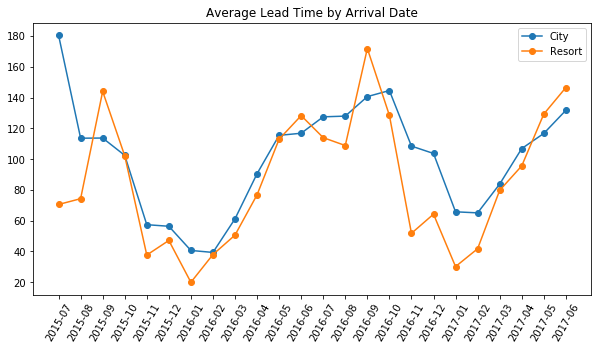

In [94]:
plt.figure(figsize=(10,5))
plt.plot(df[df["Type"]=='City'].groupby("ArrivalYM")["LeadTime"].mean(), label = "City", marker="o")
plt.plot(df[df["Type"]=='Resort'].groupby("ArrivalYM")["LeadTime"].mean(), label = "Resort", marker="o")
plt.xticks(rotation=60)
plt.title("Average Lead Time by Arrival Date")
plt.legend()
plt.show()

In [278]:
print("%.1f%%가 예약한 방으로 배정" % round(sum(df["ReservedRoomType"]==df["AssignedRoomType"])/len(df)*100,2))
print("%.1f%%가 예약한 방과 다르게 배정" % round(sum(df["ReservedRoomType"]!=df["AssignedRoomType"])/len(df)*100,2))

86.8%가 예약한 방으로 배정
13.2%가 예약한 방과 다르게 배정


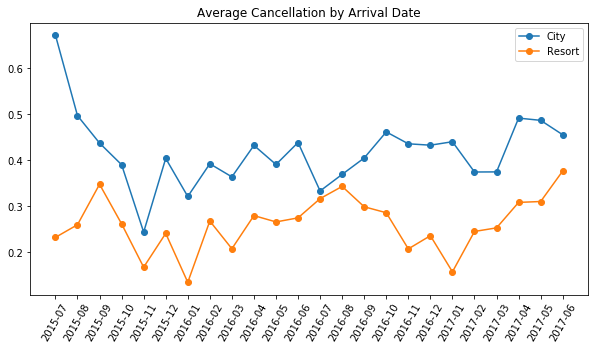

In [181]:
plt.figure(figsize=(10,5))
plt.plot(df[df["Type"]=='City'].groupby("ArrivalYM")["IsCanceled"].mean(), label = "City", marker="o")
plt.plot(df[df["Type"]=='Resort'].groupby("ArrivalYM")["IsCanceled"].mean(), label = "Resort", marker="o")
plt.xticks(rotation=60)
plt.title("Average Cancellation by Arrival Date")
plt.legend()
plt.show()

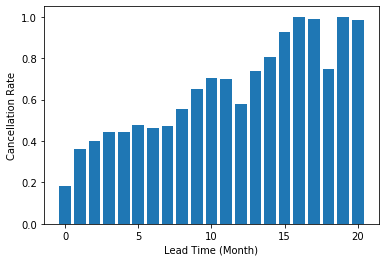

In [211]:
df["LeadTimeMonth"] = np.floor(df["LeadTime"]/30).apply(lambda x: min(x,20))
plt.bar(df.groupby("LeadTimeMonth")["IsCanceled"].mean().index,df.groupby("LeadTimeMonth")["IsCanceled"].mean())
plt.xlabel("Lead Time (Month)")
plt.ylabel("Cancellation Rate")
plt.show()

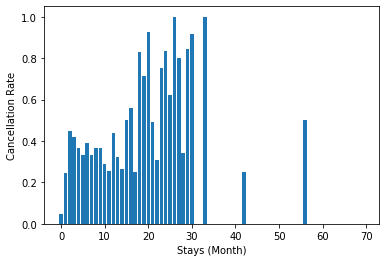

In [266]:
plt.bar(df.groupby("Stays")["IsCanceled"].mean().index,df.groupby("Stays")["IsCanceled"].mean())
plt.xlabel("Stays (Month)")
plt.ylabel("Cancellation Rate")
plt.show()

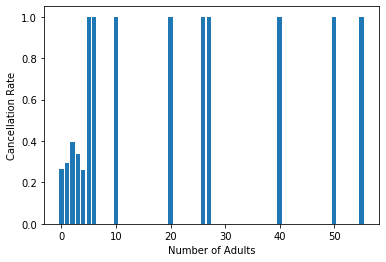

In [270]:
plt.bar(df.groupby("Adults")["IsCanceled"].mean().index,df.groupby("Adults")["IsCanceled"].mean())
plt.xlabel("Number of Adults")
plt.ylabel("Cancellation Rate")
plt.show()

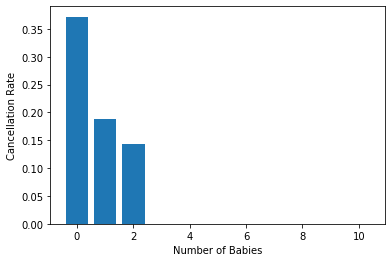

In [277]:
plt.bar(df.groupby("Babies")["IsCanceled"].mean().index,df.groupby("Babies")["IsCanceled"].mean())
plt.xlabel("Number of Babies")
plt.ylabel("Cancellation Rate")
plt.show()

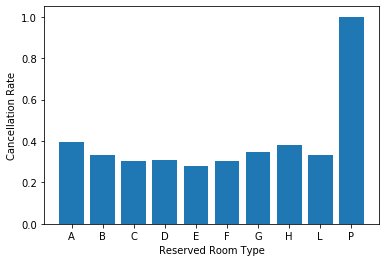

In [287]:
plt.bar(df.groupby("ReservedRoomType")["IsCanceled"].mean().index,df.groupby("ReservedRoomType")["IsCanceled"].mean())
plt.xlabel("Reserved Room Type")
plt.ylabel("Cancellation Rate")
plt.show()

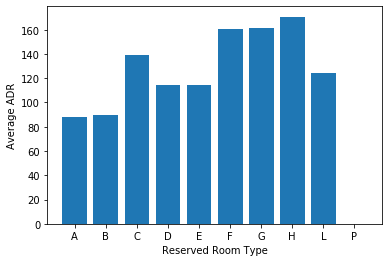

In [288]:
plt.bar(df.groupby("ReservedRoomType")["ADR"].mean().index,df.groupby("ReservedRoomType")["ADR"].mean())
plt.xlabel("Reserved Room Type")
plt.ylabel("Average ADR")
plt.show()

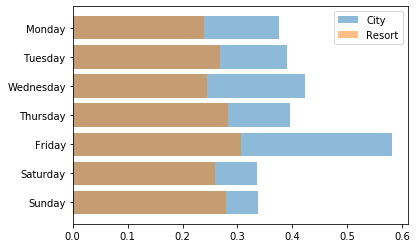

In [246]:
temp_city = df[df["Type"]=="City"].groupby("BookedDay")["IsCanceled"].mean().loc[day_order[::-1]]
temp_resort = df[df["Type"]=="Resort"].groupby("BookedDay")["IsCanceled"].mean().loc[day_order[::-1]]
plt.barh(temp_city.index, temp_city, alpha=0.5, label="City")
plt.barh(temp_resort.index, temp_resort, alpha=0.5, label="Resort")
plt.legend()
plt.show()

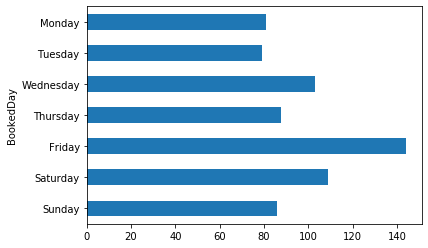

In [256]:
df.groupby("BookedDay")["LeadTime"].mean().loc[day_order[::-1]].plot(kind="barh")

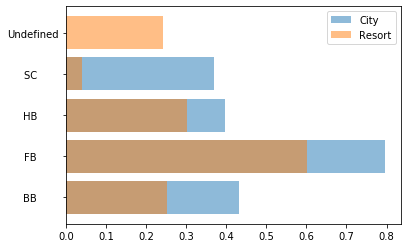

In [273]:
temp_city = df[df["Type"]=="City"].groupby("Meal")["IsCanceled"].mean()
temp_resort = df[df["Type"]=="Resort"].groupby("Meal")["IsCanceled"].mean()
plt.barh(temp_city.index, temp_city, alpha=0.5, label="City")
plt.barh(temp_resort.index, temp_resort, alpha=0.5, label="Resort")
plt.legend()
plt.show()

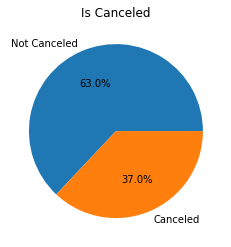

In [177]:
temp = df["IsCanceled"].value_counts()/len(df)
plt.pie(temp,labels=["Not Canceled","Canceled"],autopct="%.1f%%")
plt.title("Is Canceled")
plt.show()

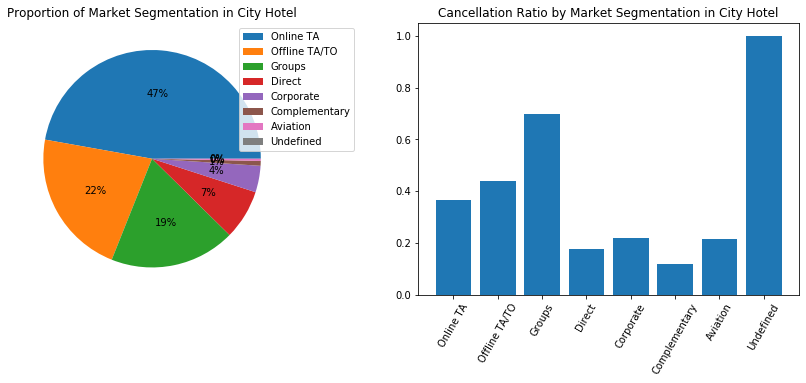

In [169]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
temp_city_count = df[df["Type"]=="City"]["MarketSegment"].value_counts()
temp_city_cancel = df[df["Type"]=="City"].groupby("MarketSegment")['IsCanceled'].mean().loc[temp_city_count.index]
ax[0].pie(temp_city_count, autopct="%.f%%")
ax[0].legend(labels=temp_city_count.index, loc='upper left',bbox_to_anchor=(0.8, 1))
ax[0].set_title("Proportion of Market Segmentation in City Hotel")
ax[1].bar(temp_city_cancel.index,temp_city_cancel)
ax[1].set_xticklabels(temp_city_cancel.index, rotation=60)
ax[1].set_title("Cancellation Ratio by Market Segmentation in City Hotel")
plt.show()

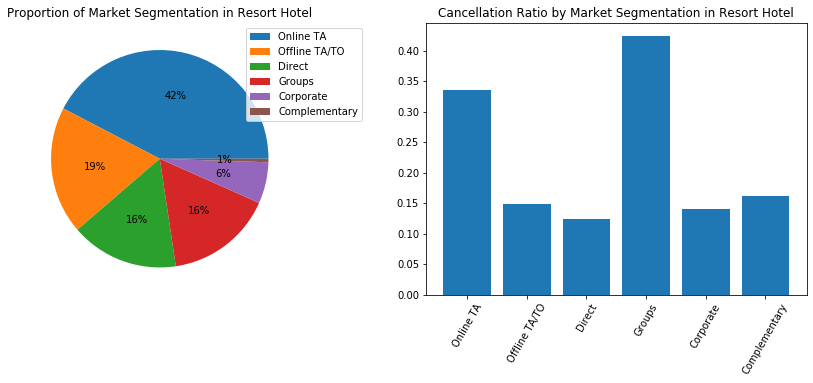

In [170]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
temp_resort_count = df[df["Type"]=="Resort"]["MarketSegment"].value_counts()
temp_resort_cancel = df[df["Type"]=="Resort"].groupby("MarketSegment")['IsCanceled'].mean().loc[temp_resort_count.index]
ax[0].pie(temp_resort_count, autopct="%.f%%")
ax[0].legend(labels=temp_resort_count.index, loc='upper left',bbox_to_anchor=(0.8, 1))
ax[0].set_title("Proportion of Market Segmentation in Resort Hotel")
ax[1].bar(temp_resort_cancel.index,temp_resort_cancel)
ax[1].set_xticklabels(temp_resort_cancel.index, rotation=60)
ax[1].set_title("Cancellation Ratio by Market Segmentation in Resort Hotel")
plt.show()